In [22]:
#| echo: False

import numpy as np
import fractions
import scipy
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})

Conjugate Gradient Method - Step by step:
Iteration 1:
  u = [8 8 16]
  x = [3/2 3/2 3/2]
  r = [1 1 -2]
  w = [1 1 -2]
  d = [3/2 3/2 -3/2]
  p = 6.0

Iteration 2:
  u = [0 3 -3]
  x = [5/2 5/2 1/2]
  r = [1 -1 0]
  w = [1 -1 0]
  d = [3/2 -1/2 -1/2]
  p = 2.0

Iteration 3:
  u = [1 -1 0]
  x = [4 2 0]
  r = [0 0 0]
  w = [0 0 0]
  d = [0 0 0]
  p = 0.0



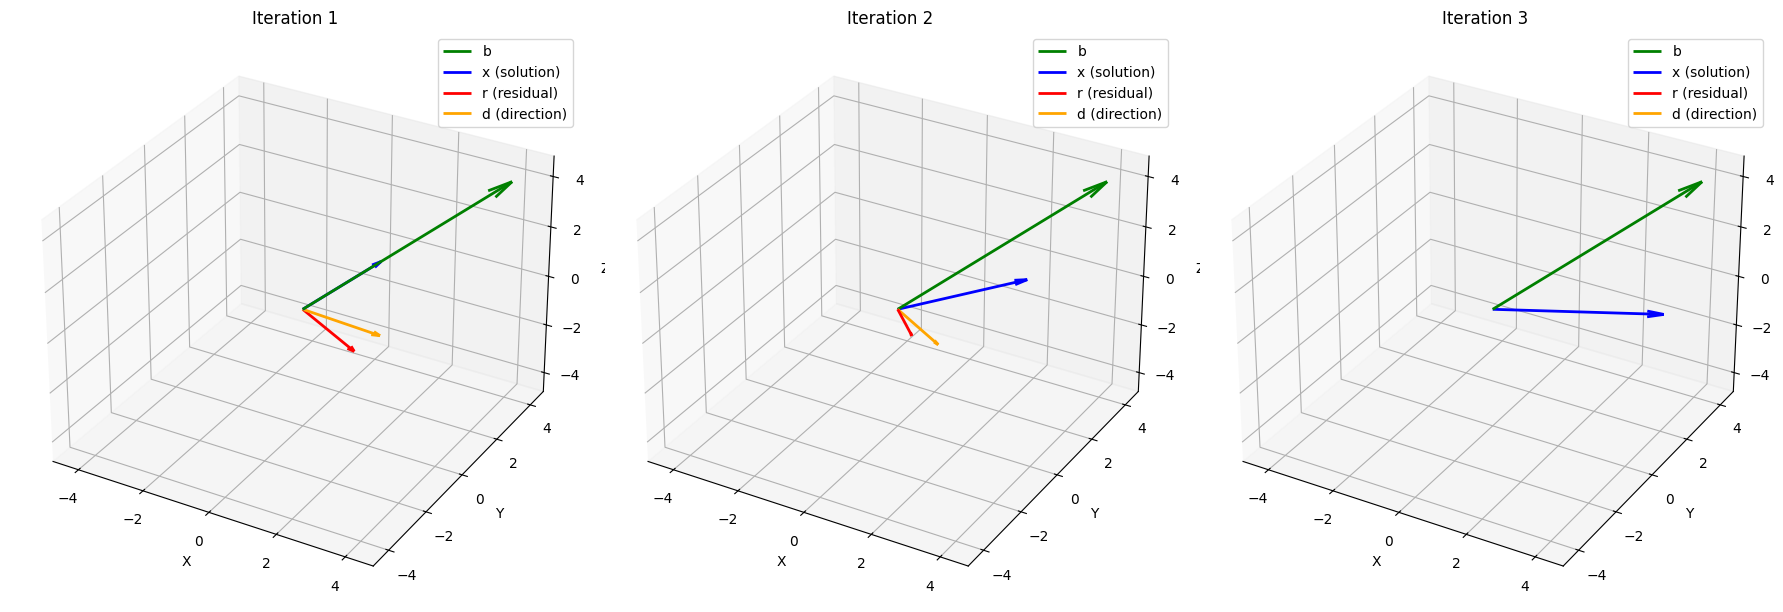

In [45]:
# Configure matplotlib for Jupyter notebooks
%matplotlib inline

A = np.array([
    [1, 0, 1],
    [0, 2, 0],
    [1, 0, 3]
])
b = np.array([4, 4, 4])

def plot_cg_iterations(iterations_data):
    fig = plt.figure(figsize=(18, 6))
    
    for i, (x, r, w, d, u) in enumerate(iterations_data):
        ax = fig.add_subplot(1, 3, i+1, projection='3d')

        # Plot vectors with better visibility
        ax.quiver(0, 0, 0, *b, color='green', label='b', arrow_length_ratio=0.1, linewidth=2)
        ax.quiver(0, 0, 0, *x, color='blue', label='x (solution)', arrow_length_ratio=0.1, linewidth=2)
        ax.quiver(0, 0, 0, *r, color='red', label='r (residual)', arrow_length_ratio=0.1, linewidth=2)
        ax.quiver(0, 0, 0, *d, color='orange', label='d (direction)', arrow_length_ratio=0.1, linewidth=2)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.legend()
        ax.set_title(f'Iteration {i+1}')
        
        # Set equal aspect ratio for better visualization
        max_range = 4 * 1.2
        ax.set_xlim([-max_range, max_range])
        ax.set_ylim([-max_range, max_range])
        ax.set_zlim([-max_range, max_range])
    
    plt.tight_layout()
    plt.show()

B = np.identity(3)
x = np.zeros(3)

r = b - A @ x
w = B @ r
p = np.dot(w, r)

d = w

print("Conjugate Gradient Method - Step by step:")
print("="*50)

# Store iteration data for plotting
iterations_data = []

for k in range(3):
    u = A @ d
    alpha = p / np.dot(u, d)
    x += alpha * d
    r -= alpha * u
    w = B @ r
    p_next = np.dot(w, r)
    d = w + (p_next / p) * d

    p = p_next
    print(f"Iteration {k+1}:")
    print(f"  u = {u}")
    print(f"  x = {x}")
    print(f"  r = {r}")
    print(f"  w = {w}")
    print(f"  d = {d}")
    print(f"  p = {p}")
    
    # Store vectors for plotting
    iterations_data.append((x.copy(), r.copy(), w.copy(), d.copy(), u.copy()))
    print()

# Plot all iterations side by side
plot_cg_iterations(iterations_data)